In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
from urllib.parse import urlparse ,urlencode
import urllib.request
import random
import ipaddress
import re
from bs4 import BeautifulSoup
#import whois
from datetime import datetime
import requests
np.random.seed(10)

In [2]:
# Upload datasets
df = pd.read_csv(".\\data\\combined_urls.csv")

In [3]:
df.head()

,url,is_phishing,target
0,http://www.bancasella-web.x10.mx,1,Other
1,https://sites.google.com/view/bt-web-net/home,1,Other
2,https://mch7jm6bjg6bp.clickfunnels.com/optinsk...,1,Other
3,https://mch7jm6bjg6bp.clickfunnels.com/optin16...,1,Other
4,https://bbbttts-amazing-site.webflow.io/,1,Other


In [4]:
def data_info(df):
    print('SHAPE')
    print(df.shape)
    print('=====')
    print('DTYPES')
    print(df.dtypes)
    print('=====')
    print('NULL VALUES')
    print(df.isnull().sum())
    print('=====')

In [5]:
data_info(df)

SHAPE
(187177, 3)
=====
DTYPES
url            object
is_phishing     int64
target         object
dtype: object
=====
NULL VALUES
url            0
is_phishing    0
target         0
dtype: int64
=====


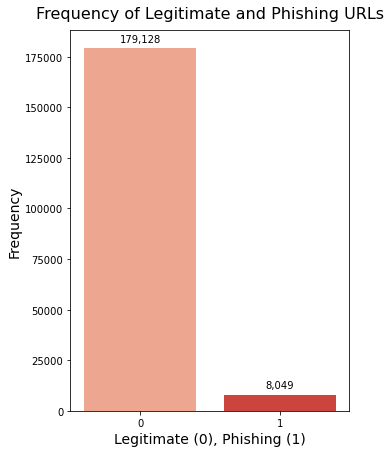

In [6]:
plt.figure(figsize = (5, 7))        
bar = sns.countplot(x=df["is_phishing"], 
              data=df, 
              palette="Reds")
for p in bar.patches:
    bar.annotate(format(p.get_height(), ','), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Frequency of Legitimate and Phishing URLs', fontsize = 16, pad = 12)
plt.xlabel('Legitimate (0), Phishing (1)', fontsize = 14)
plt.ylabel("Frequency",fontsize = 14)
plt.show();

In [7]:
urls = [url for url in df['url']]
# Code adapted from https://stackoverflow.com/questions/48927719/parse-split-urls-in-a-pandas-dataframe-using-urllib
df['protocol'],df['domain'],df['path'],df['query'],df['fragment'] = zip(*[urllib.parse.urlsplit(x) for x in urls])

In [8]:
df.head()

,url,is_phishing,target,protocol,domain,path,query,fragment
0,http://www.bancasella-web.x10.mx,1,Other,http,www.bancasella-web.x10.mx,,,
1,https://sites.google.com/view/bt-web-net/home,1,Other,https,sites.google.com,/view/bt-web-net/home,,
2,https://mch7jm6bjg6bp.clickfunnels.com/optinsk...,1,Other,https,mch7jm6bjg6bp.clickfunnels.com,/optinsk9beto5,,
3,https://mch7jm6bjg6bp.clickfunnels.com/optin16...,1,Other,https,mch7jm6bjg6bp.clickfunnels.com,/optin1640560541772,,
4,https://bbbttts-amazing-site.webflow.io/,1,Other,https,bbbttts-amazing-site.webflow.io,/,,


In [9]:
tlds = []
for d in df['domain']:
    tlds.append(d.split('.')[-1])
df['tld']=tlds

In [10]:
tlds_counts = df['tld'].value_counts()
tlds_counts.index = tlds_counts.index.astype(str)
tlds_counts = tlds_counts.to_dict()

In [11]:
high_freq = [k for k,v in tlds_counts.items() if v > 7000]
print(high_freq)

['com', 'ru', 'net']


In [12]:
df.loc[~df['tld'].isin(high_freq), 'tld'] = 'other'

In [13]:
df.head(100)

,url,is_phishing,target,protocol,domain,path,query,fragment,tld
0,http://www.bancasella-web.x10.mx,1,Other,http,www.bancasella-web.x10.mx,,,,other
1,https://sites.google.com/view/bt-web-net/home,1,Other,https,sites.google.com,/view/bt-web-net/home,,,com
2,https://mch7jm6bjg6bp.clickfunnels.com/optinsk...,1,Other,https,mch7jm6bjg6bp.clickfunnels.com,/optinsk9beto5,,,com
3,https://mch7jm6bjg6bp.clickfunnels.com/optin16...,1,Other,https,mch7jm6bjg6bp.clickfunnels.com,/optin1640560541772,,,com
4,https://bbbttts-amazing-site.webflow.io/,1,Other,https,bbbttts-amazing-site.webflow.io,/,,,other
...,...,...,...,...,...,...,...,...,...
95,https://account-appeal-form-18293758.web.app/c...,1,Facebook,https,account-appeal-form-18293758.web.app,/check.html,,,other
96,https://account-appeal-form-18293758.web.app/,1,Facebook,https,account-appeal-form-18293758.web.app,/,,,other
97,http://eventff-garena-ffbgid-61.duckdns.org/,1,Other,http,eventff-garena-ffbgid-61.duckdns.org,/,,,other
98,http://045a8af.netsolhost.com/mint/chasebank/c...,1,Other,http,045a8af.netsolhost.com,/mint/chasebank/chasebank/ggggdasd/,,,com


In [14]:

df = pd.get_dummies(data=df,columns=['tld'])


In [15]:
df.head()

,url,is_phishing,target,protocol,domain,path,query,fragment,tld_com,tld_net,tld_other,tld_ru
0,http://www.bancasella-web.x10.mx,1,Other,http,www.bancasella-web.x10.mx,,,,0,0,1,0
1,https://sites.google.com/view/bt-web-net/home,1,Other,https,sites.google.com,/view/bt-web-net/home,,,1,0,0,0
2,https://mch7jm6bjg6bp.clickfunnels.com/optinsk...,1,Other,https,mch7jm6bjg6bp.clickfunnels.com,/optinsk9beto5,,,1,0,0,0
3,https://mch7jm6bjg6bp.clickfunnels.com/optin16...,1,Other,https,mch7jm6bjg6bp.clickfunnels.com,/optin1640560541772,,,1,0,0,0
4,https://bbbttts-amazing-site.webflow.io/,1,Other,https,bbbttts-amazing-site.webflow.io,/,,,0,0,1,0


In [16]:
def get_features(df):
    needed_cols = ['url', 'domain', 'path', 'query', 'fragment']
    for col in needed_cols:
        df[f'{col}_length']=df[col].str.len()
        df[f'qty_dot_{col}'] = df[[col]].applymap(lambda x: str.count(x, '.'))
        df[f'qty_hyphen_{col}'] = df[[col]].applymap(lambda x: str.count(x, '-'))
        df[f'qty_slash_{col}'] = df[[col]].applymap(lambda x: str.count(x, '/'))
        df[f'qty_questionmark_{col}'] = df[[col]].applymap(lambda x: str.count(x, '?'))
        df[f'qty_equal_{col}'] = df[[col]].applymap(lambda x: str.count(x, '='))
        df[f'qty_at_{col}'] = df[[col]].applymap(lambda x: str.count(x, '@'))
        df[f'qty_and_{col}'] = df[[col]].applymap(lambda x: str.count(x, '&'))
        df[f'qty_exclamation_{col}'] = df[[col]].applymap(lambda x: str.count(x, '!'))
        df[f'qty_space_{col}'] = df[[col]].applymap(lambda x: str.count(x, ' '))
        df[f'qty_tilde_{col}'] = df[[col]].applymap(lambda x: str.count(x, '~'))
        df[f'qty_comma_{col}'] = df[[col]].applymap(lambda x: str.count(x, ','))
        df[f'qty_plus_{col}'] = df[[col]].applymap(lambda x: str.count(x, '+'))
        df[f'qty_asterisk_{col}'] = df[[col]].applymap(lambda x: str.count(x, '*'))
        df[f'qty_hashtag_{col}'] = df[[col]].applymap(lambda x: str.count(x, '#'))
        df[f'qty_dollar_{col}'] = df[[col]].applymap(lambda x: str.count(x, '$'))
        df[f'qty_percent_{col}'] = df[[col]].applymap(lambda x: str.count(x, '%'))

In [17]:
# Applying function
get_features(df)

In [18]:
df.head()

,url,is_phishing,target,protocol,domain,path,query,fragment,tld_com,tld_net,...,qty_and_fragment,qty_exclamation_fragment,qty_space_fragment,qty_tilde_fragment,qty_comma_fragment,qty_plus_fragment,qty_asterisk_fragment,qty_hashtag_fragment,qty_dollar_fragment,qty_percent_fragment
0,http://www.bancasella-web.x10.mx,1,Other,http,www.bancasella-web.x10.mx,,,,0,0,...,0,0,0,0,0,0,0,0,0,0
1,https://sites.google.com/view/bt-web-net/home,1,Other,https,sites.google.com,/view/bt-web-net/home,,,1,0,...,0,0,0,0,0,0,0,0,0,0
2,https://mch7jm6bjg6bp.clickfunnels.com/optinsk...,1,Other,https,mch7jm6bjg6bp.clickfunnels.com,/optinsk9beto5,,,1,0,...,0,0,0,0,0,0,0,0,0,0
3,https://mch7jm6bjg6bp.clickfunnels.com/optin16...,1,Other,https,mch7jm6bjg6bp.clickfunnels.com,/optin1640560541772,,,1,0,...,0,0,0,0,0,0,0,0,0,0
4,https://bbbttts-amazing-site.webflow.io/,1,Other,https,bbbttts-amazing-site.webflow.io,/,,,0,0,...,0,0,0,0,0,0,0,0,0,0


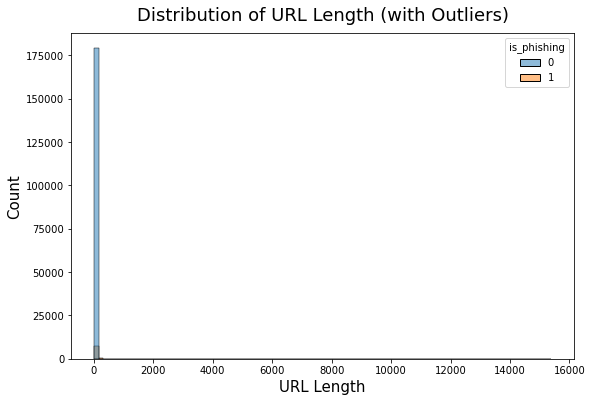

In [19]:
plt.figure(figsize=(9,6))
sns.histplot(data=df, x=df["url_length"], hue = 'is_phishing', bins=100)
plt.title('Distribution of URL Length (with Outliers)', fontsize = 18, pad = 12)
plt.xlabel("URL Length", fontsize = 15)
plt.ylabel("Count",fontsize = 15);
plt.show()

In [20]:
Q1 = df['url_length'].quantile(0.25)
Q3 = df['url_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_url_length = df[(df['url_length']> lower_bound)]
filtered_url_length = df[(df['url_length']< upper_bound)]

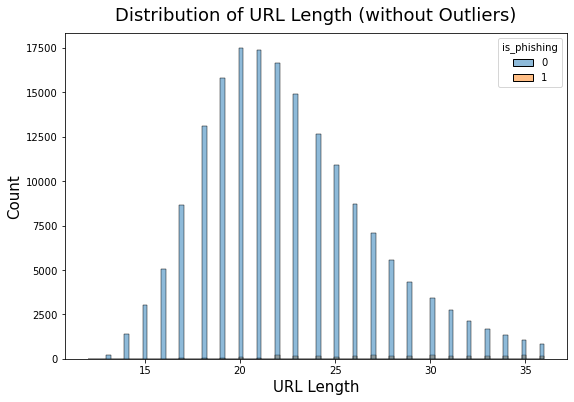

In [21]:
plt.figure(figsize=(9,6))
sns.histplot(data=filtered_url_length, x="url_length", hue = 'is_phishing', bins = 100)
plt.title('Distribution of URL Length (without Outliers)', fontsize = 18, pad = 12)
plt.xlabel("URL Length", fontsize = 15)
plt.ylabel("Count",fontsize = 15);
plt.show()

In [22]:
#URL string Features

# Checks for IP address in URL (Have_IP)
def havingIP(url):
    url= str(url)
    try:
        ipaddress.ip_address(url)
        ip = 1
    except:
        ip = 0
    return ip

# Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
    url= str(url)
    if "@" in url:
        at = 1    
    else:
        at = 0    
    return at


# Finding the length of URL and categorizing (URL_Length)
def getLength(url):
    url= str(url)
    if len(url) < 54:
        length = 0            
    else:
        length = 1            
    return length


# Gives number of '/' in URL (URL_Depth)
def getDepth(url):
    url= str(url)
    s = urlparse(url).path.split('/')
    depth = 0
    for j in range(len(s)):
        if len(s[j]) != 0:
            depth = depth+1
    return depth

# Checking for redirection '//' in the url (Redirection)
def redirection(url):
    url= str(url)
    pos = url.find('//')
    if pos > 6:
        if pos > 7:
            return 1
        else:
            return 0
    else:
        return 0


# Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
    url= str(url)
    domain = urlparse(url).netloc
    if 'https' in domain:
        return 1
    else:
        return 0

#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

# Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    url = str(url)
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0


# Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    url= str(url)
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate



# URL domain features:

#Protocol Check
def hasHttp(url):
    url= str(url)
    return 'http:' in url

def hasHttps(url):
    url= str(url)
    return 'https:' in url


# Web traffic (Web_Traffic)
def web_traffic(url):
    url= str(url)
    try:
        #Filling the whitespaces in the URL if any
        url = urllib.parse.quote(url)
        rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
            "REACH")['RANK']
        rank = int(rank)
        print(rank)
    except TypeError:
        return 1
    if rank <100000:
        return 1
    else:
        return 0
1

# Survival time of domain: The difference between termination time and creation time (Domain_Age)  
def domainAge(domain_name):
    domain_name= str(domain_name)
    creation_date = domain_name.creation_date
    expiration_date = domain_name.expiration_date
    if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
        try:
            creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
            expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
        except:
            return 1
    if ((expiration_date is None) or (creation_date is None)):
        return 1
    elif ((type(expiration_date) is list) or (type(creation_date) is list)):
        return 1
    else:
        ageofdomain = abs((expiration_date - creation_date).days)
        if ((ageofdomain/30) < 6):
            age = 1
        else:
            age = 0
    return age

# End time of domain: The difference between termination time and current time (Domain_End) 
def domainEnd(domain_name):
    domain_name= str(domain_name)
    expiration_date = domain_name.expiration_date
    if isinstance(expiration_date,str):
        try:
            expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
        except:
            return 1
    if (expiration_date is None):
        return 1
    elif (type(expiration_date) is list):
        return 1
    else:
        today = datetime.now()
        end = abs((expiration_date - today).days)
        if ((end/30) < 6):
            end = 0
        else:
            end = 1
    return end

##HTML and JavaScript based Features

# IFrame Redirection (iFrame)
def iframe(response):
    response= str(response)
    if response == "":
        return 1
    else:
        if re.findall(r"[<iframe>|<frameBorder>]", response):
            return 0
        else:
            return 1

# Checks the effect of mouse over on status bar (Mouse_Over)
def mouseOver(response): 
    response= str(response)
    if response == "" :
        return 1
    else:
        if re.findall("<script>.+onmouseover.+</script>", response):
            return 1
        else:
            return 0


# Checks the status of the right click attribute (Right_Click)
def rightClick(response):
    response= str(response)
    if response == "":
        return 1
    else:
        if re.findall(r"event.button ?== ?2", response):
            return 0
        else:
            return 1


# Checks the number of forwardings (Web_Forwards)    
def forwarding(response):
    response= str(response)
    if response == "":
        return 1
    else:
        if len(response) <= 2:
            return 0
        else:
            return 1

#Address bar based features (10)
df['haveingIP'] = havingIP(df['url'])
df['haveAtSign'] = haveAtSign(df['url'])
df['getLength'] = getLength(df['url'])
# df['redirection'] = redirection(df['url'])
df['httpDomain'] = httpDomain(df['url'])
df['tinyURL'] = tinyURL(df['url'])
df['prefixSuffix'] = prefixSuffix(df['url'])

df['hasHttp'] = hasHttp(df['url'])
df['hasHttps'] = hasHttps(df['url'])
df['web_traffic'] = web_traffic(df['url'])

# HTML & Javascript based features
try:
    df['response'] = requests.get(str(df['url']))
except:
    df['response'] = ""

df['iframe'] = iframe(df['response'])
df['mouseOver'] = mouseOver(df['response'])
df['rightClick'] = rightClick(df['response'])
df['forwarding'] = forwarding(df['response'])

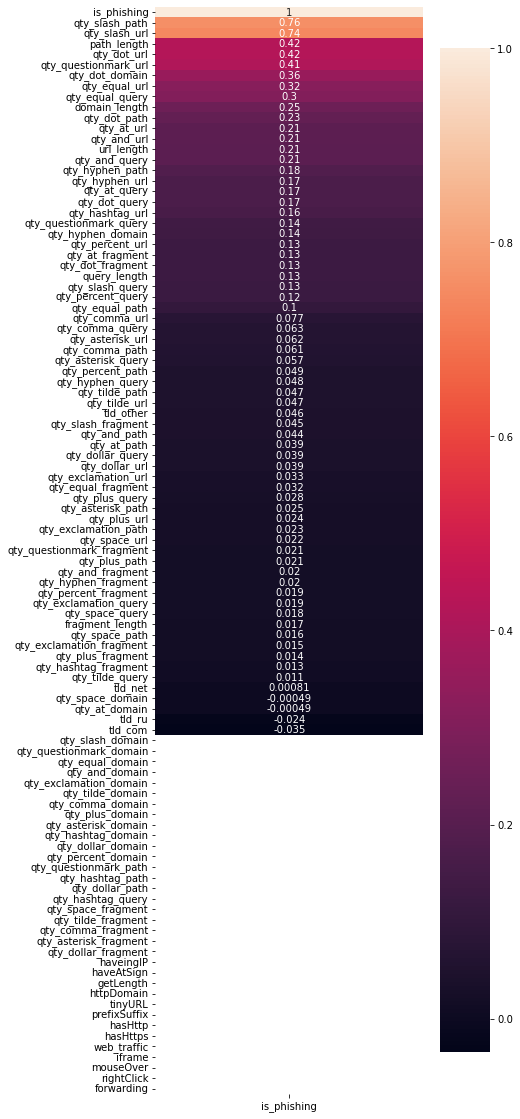

In [23]:
plt.figure(figsize=(6,20))
sns.heatmap(df.corr()[['is_phishing']].sort_values('is_phishing', ascending=False), annot=True);

In [39]:
to_drop = df.corr()[['is_phishing']].sort_values('is_phishing', ascending=False)

In [40]:
print(to_drop['is_phishing'])

is_phishing       1.000000
qty_slash_path    0.757866
qty_slash_url     0.744224
path_length       0.424520
qty_dot_url       0.424248
                    ...   
web_traffic            NaN
iframe                 NaN
mouseOver              NaN
rightClick             NaN
forwarding             NaN
Name: is_phishing, Length: 63, dtype: float64


In [41]:
to_drop = to_drop['is_phishing'].to_dict()


In [42]:
to_drop = [k for k,v in to_drop.items() if v < 0.1 or np.isnan(v)]
print(to_drop)

['qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_questionmark_path', 'qty_hashtag_path', 'qty_dollar_path', 'qty_hashtag_query', 'qty_space_fragment', 'qty_tilde_fragment', 'qty_comma_fragment', 'qty_asterisk_fragment', 'qty_dollar_fragment', 'haveingIP', 'haveAtSign', 'getLength', 'httpDomain', 'tinyURL', 'prefixSuffix', 'hasHttp', 'hasHttps', 'web_traffic', 'iframe', 'mouseOver', 'rightClick', 'forwarding']


In [43]:
df.drop(columns = to_drop, inplace=True)

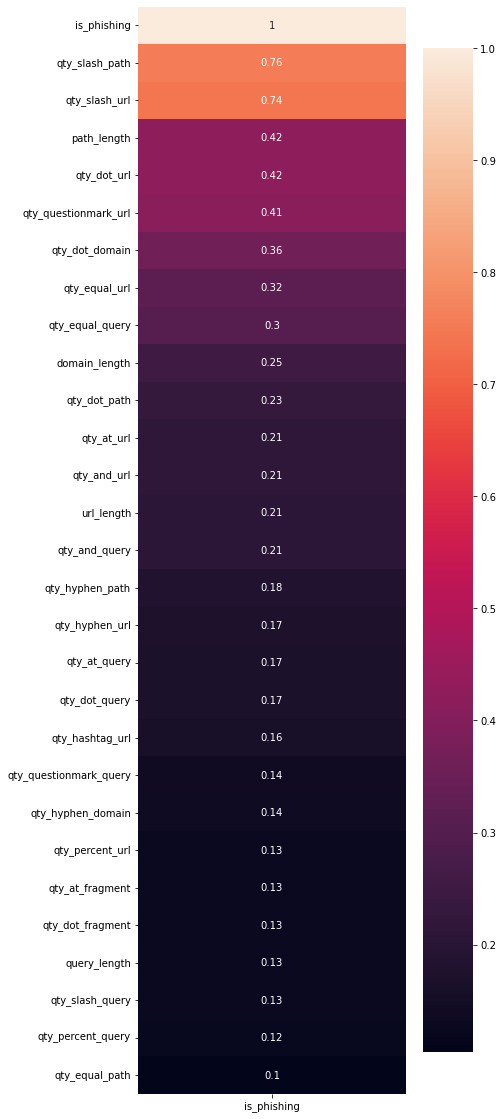

In [44]:
plt.figure(figsize=(6,20))
sns.heatmap(df.corr()[['is_phishing']].sort_values('is_phishing', ascending=False), annot=True);

In [45]:
df.to_csv(".\\data\\processed_urls.csv", index=False)